In [2]:
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import datetime
import requests
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
py.init_notebook_mode(connected=True)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import pickle
from sklearn import linear_model, preprocessing


In [3]:

covid19India = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\covid 19\covid_19_india (1).csv')
covidVaccine = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\covid 19\covid_vaccine_statewise.csv')
stateDetails = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\covid 19\StatewiseTestingDetails.csv')

In [4]:
covid19India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
covid19India['Date'] = pd.to_datetime(covid19India['Date'],dayfirst=True)
df1=covid19India.groupby('Date').sum()
df1.reset_index(inplace=True)

In [6]:
df1.head()

,Date,Sno,Cured,Deaths,Confirmed
0,2020-01-30,1,0,0,1
1,2020-01-31,2,0,0,1
2,2020-02-01,3,0,0,2
3,2020-02-02,4,0,0,3
4,2020-02-03,5,0,0,3


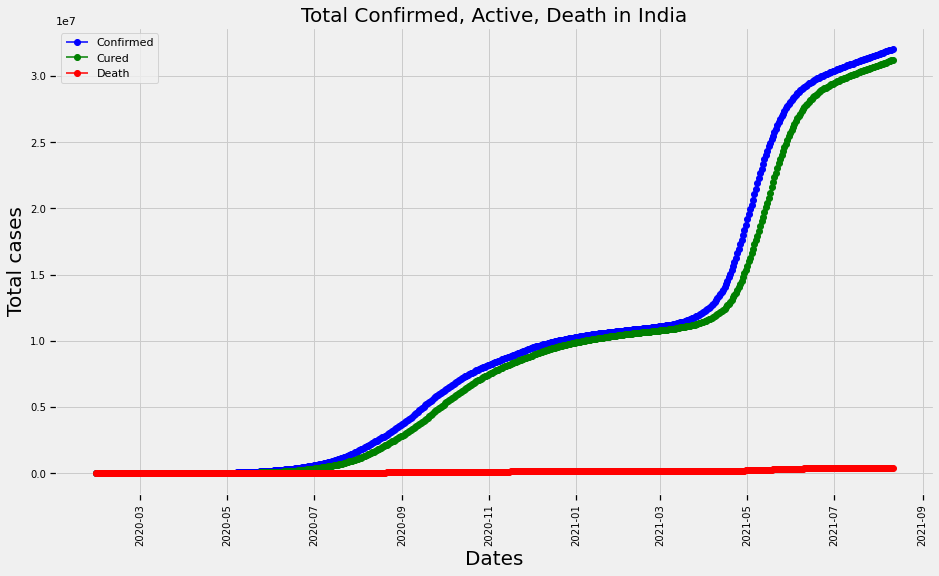

In [7]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df1,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df1,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend()

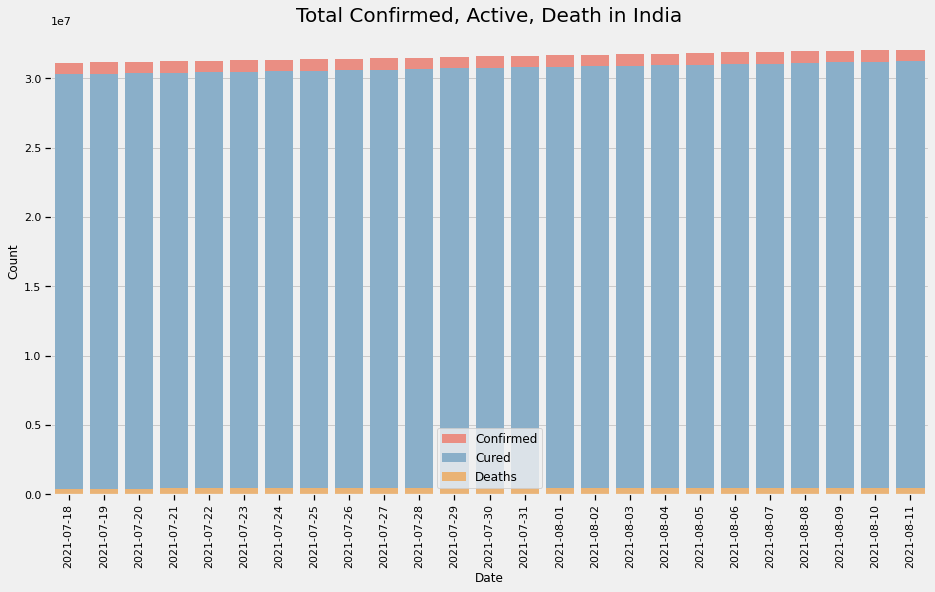

In [8]:
df2=df1.tail(25)
df2['Date'] = df2['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12);

In [9]:
state_cases=covid19India.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - abs((state_cases['Deaths']- state_cases['Cured']))
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
27,Maharashtra,6363442,134201,6159676,337967,2.110000,96.800000
28,Maharashtra***,6229596,130753,6000911,359438,2.100000,96.330000
22,Kerala,3586693,18004,3396184,208513,0.500000,94.690000
21,Karnataka,2921049,36848,2861499,96398,1.260000,97.960000
20,Karanataka,2885238,36197,2821491,99944,1.250000,97.790000
38,Tamil Nadu,2579130,34367,2524400,89097,1.330000,97.880000
1,Andhra Pradesh,1985182,13564,1952736,46010,0.680000,98.370000
43,Uttar Pradesh,1708812,22775,1685492,46095,1.330000,98.640000
45,West Bengal,1534999,18252,1506532,46719,1.190000,98.150000
12,Delhi,1436852,25068,1411280,50640,1.740000,98.220000


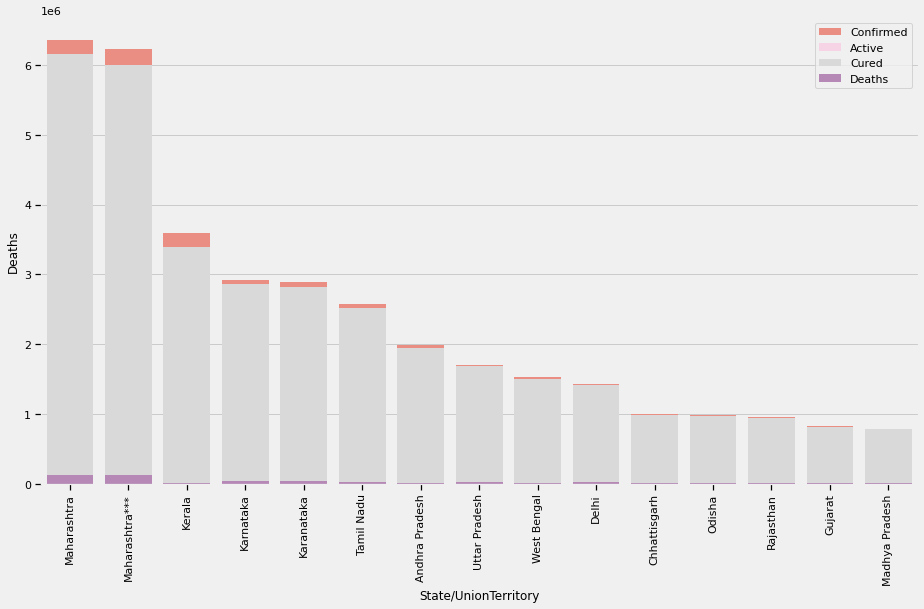

In [10]:
state_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0)
state_cases=state_cases.head(15)
state_cases
plt.figure(figsize=(14,8))
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Active',color=sns.color_palette('Set3')[7],label='Active')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Cured',color=sns.color_palette('Set3')[8],label='Cured')
sns.barplot(data=state_cases,x='State/UnionTerritory',y='Deaths',color=sns.color_palette('Set3')[9],label='Deaths')
plt.xticks(rotation=90)
plt.legend();

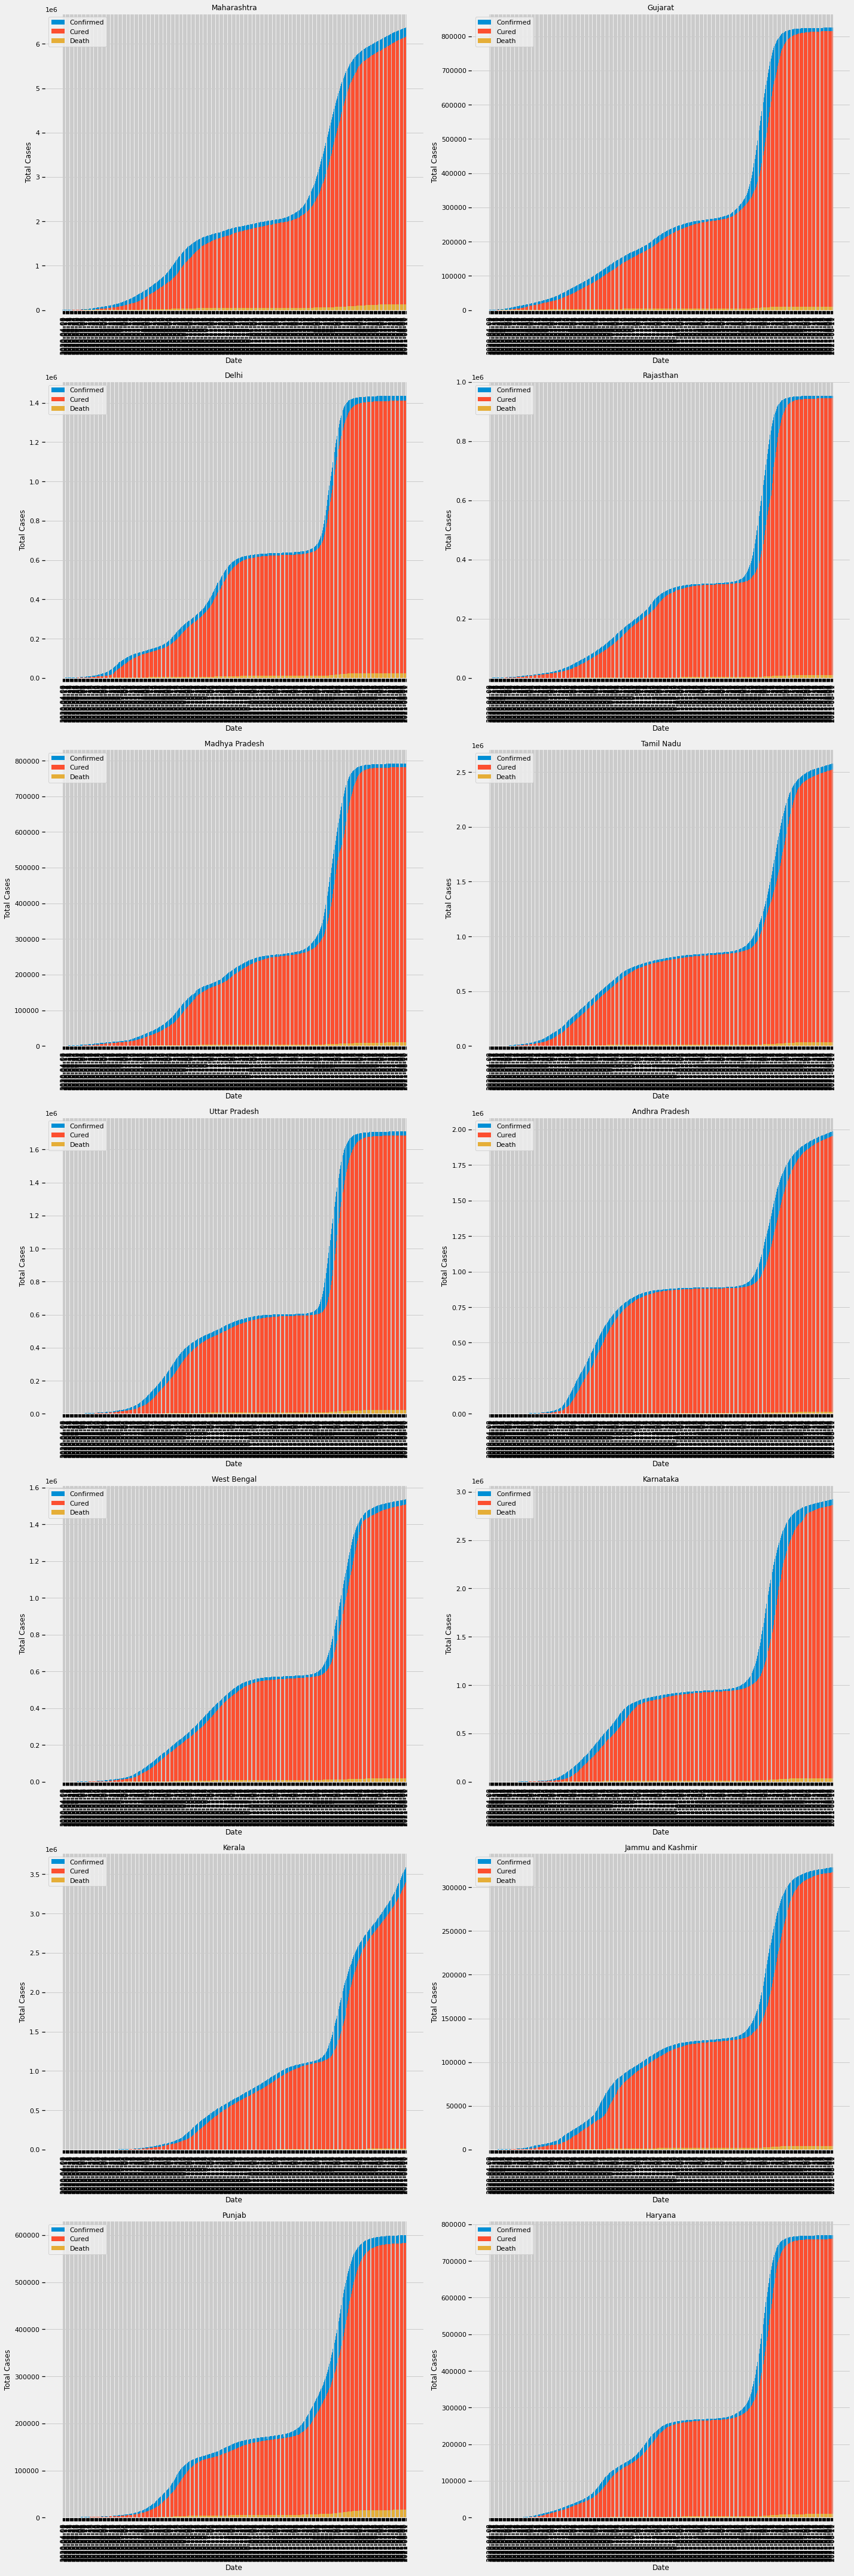

In [11]:
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']
df5=covid19India[covid19India['Date']>'2020-04-07']
df5=df5.groupby(['Date','State/UnionTerritory']).sum()
df5.reset_index(inplace=True)
df5['Date'] = df5['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(20,60))

for i,state in enumerate(states_list):
    plt.subplot(7,2,i+1)
    df4=df5[df5['State/UnionTerritory']==state]
    plt.bar(df4.Date,df4.Confirmed,label='Confirmed')
    plt.bar(df4.Date,df4.Cured,label='Cured')
    plt.bar(df4.Date,df4.Deaths,label='Death')
    plt.xticks(rotation=90)
    plt.title(state)
    plt.ylabel('Total Cases')
    plt.xlabel('Date')
    plt.legend()
plt.tight_layout()
plt.show()

In [12]:
covidVaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [18]:
covidVaccine.head()

,Date,State,TotalDoses,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male,Female,Transgender(Individuals Vaccinated),TotalVaccinated
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [20]:
covidVaccine.drop(covidVaccine.loc[covidVaccine['State']=='India'].index, inplace=True)

In [21]:
covidVaccine = covidVaccine.rename(columns= {'Updated On':'Date','Total Doses Administered':'TotalDoses','Male(Individuals Vaccinated)':'Male','Female(Individuals Vaccinated)':'Female', 'Total Individuals Vaccinated':'TotalVaccinated',' Covaxin (Doses Administered)':'Covaxin','CoviShield (Doses Administered)':'CoviShield','Sputnik V (Doses Administered)':'Sputnik'})
covidVaccine.Date = pd.to_datetime(covidVaccine.Date, format="%d/%m/%Y")

In [23]:
covidVaccine_2 = covidVaccine.groupby(['State'])['TotalDoses','Covaxin','CoviShield','Sputnik', 'TotalVaccinated'].sum().reset_index()
covidVaccine_2.dropna()
covidVaccine = covidVaccine[covidVaccine['State'] !='India']


In [24]:
fig = px.bar(covidVaccine_2, x='State', y='TotalDoses',text='TotalDoses')
fig.update_traces(marker_color='darkgreen',texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=900, height=900, bargap=0.05)
fig.show()

In [25]:
fig = px.bar(covidVaccine_2, x="State", y=["Covaxin", "CoviShield",'TotalDoses'])

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.0),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid-19 Total Vaccinations in India according to type of vaccine<b>',
                  title_x=0.5,
                  width= 1100,
                  height= 1000
                 )
fig.update_xaxes(tickfont=dict(color='black', size=14))
fig.update_yaxes(tickfont=dict(color='black', size=14))
fig.show()

In [26]:
dataset = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\covid 19\new1.csv')
dataset = dataset.reindex(np.random.permutation(dataset.index))

X = dataset.iloc[:, 5:7].values
y = dataset.iloc[:, -1].values


print(dataset.head())
print(dataset.groupby('vulnerability').size())

le = preprocessing.LabelEncoder()
y=le.fit_transform(list(dataset['vulnerability']))


               Name: Register Number :                      Branch:  \
332    Challa Nohith         16MIS1099  M.tech Software Engineering   
186            Bindu         18BME1111                   Mechanical   
222  Anandaveeryan D         16MIS1040                          MIS   
661              NaN               NaN                          NaN   
76      Nayanthara B         18bla1059                          Law   

    Mention the State where you live currently  \
332                                  Telangana   
186                                  Tamilnadu   
222                                  Tamilnadu   
661                                        NaN   
76                                      Kerala   

    Mention the district where you live currently  \
332                                   Mahabubabad   
186                                   Krishnagiri   
222                                       Chennai   
661                                      Medchal    
76     

In [27]:
"""## Splitting the dataset into the Training set and Test set"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
"""## Feature Scaling"""

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from math import sqrt
from sklearn.metrics import mean_squared_error


print(X_train)
print(y_train)

[[-1.4608598  -1.19485352]
 [ 1.14154958  1.24988966]
 [ 1.52839422  1.89324312]
 ...
 [ 0.403028   -0.03681728]
 [ 0.75470494  0.64942642]
 [-1.28502133 -1.06618282]]
[2 0 0 1 2 0 2 2 2 1 1 0 2 0 2 0 2 0 1 2 0 0 1 0 0 1 0 0 1 1 0 2 0 1 0 0 0
 2 0 0 0 1 0 1 0 2 1 2 1 0 2 1 2 2 0 1 2 1 0 2 2 0 0 0 0 2 0 2 2 0 1 0 0 1
 0 2 0 2 0 2 1 2 1 0 1 2 2 1 2 2 2 1 2 0 1 0 2 2 2 1 1 2 2 0 0 2 1 1 2 2 0
 2 1 0 2 0 1 1 0 0 1 2 2 1 2 0 0 1 0 1 0 0 0 1 1 1 2 1 1 1 1 0 2 1 0 2 2 0
 2 2 1 2 2 1 0 1 0 2 1 0 0 2 1 0 2 0 1 1 2 2 1 2 1 1 1 1 2 2 0 2 0 1 0 2 1
 2 0 1 2 0 2 1 2 1 0 1 0 1 2 0 1 2 1 0 1 1 0 1 2 0 0 0 2 1 1 1 1 0 2 2 0 0
 1 0 2 1 2 1 2 1 2 1 1 2 0 0 2 1 0 2 1 1 1 2 0 2 1 0 0 0 2 0 2 1 0 2 0 0 2
 0 0 1 1 1 0 1 1 0 1 0 2 1 0 2 1 1 0 1 2 0 0 0 1 1 1 0 0 0 0 0 2 1 2 1 2 0
 1 2 1 1 0 0 1 0 1 0 2 2 1 2 1 2 2 2 0 1 1 0 0 1 2 1 0 1 1 0 2 2 0 1 0 2 2
 1 0 1 0 0 0 0 0 2 2 0 2 2 2 2 0 0 0 1 1 1 1 1 1 2 1 0 2 1 1 2 0 2 0 0 2 2
 1 0 1 1 1 1 0 0 2 2 2 1 2 0 0 2 1 0 0 1 2 1 0 0 2 0 2 0 1 2 1 1 0 2 2 0 2
 1 2 2 

In [29]:
"""## Training the K-NN model on the Training set"""

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Its important to use binary mode
knnPickle = open('C:\\Users\\Admin\\OneDrive\\Desktop\\covid 19\\knnpickle_file', 'wb')

# source, destination
pickle.dump(classifier, knnPickle)



In [30]:
# load the model from disk
loaded_model = pickle.load(open('C:\\Users\\Admin\\OneDrive\\Desktop\\covid 19\\knnpickle_file', 'rb'))
result = loaded_model.predict(X_test)


In [31]:
"""## Predicting the Test set results"""

y_pred = loaded_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

[[61  0  0]
 [ 2 65  1]
 [ 0  0 60]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.96      0.98        68
           2       0.98      1.00      0.99        60

    accuracy                           0.98       189
   macro avg       0.98      0.99      0.98       189
weighted avg       0.98      0.98      0.98       189



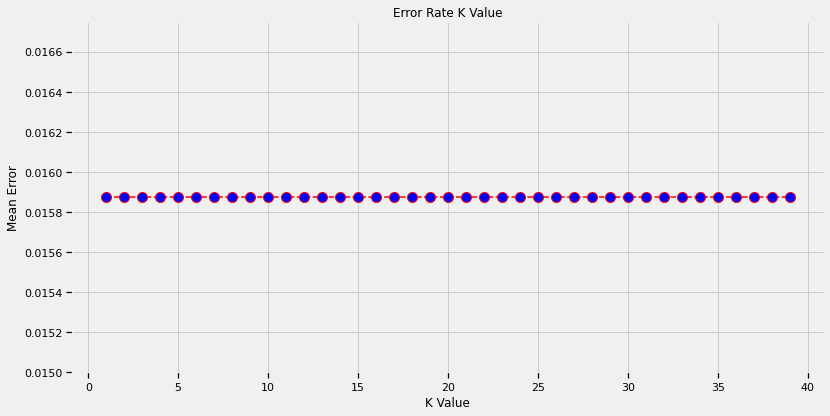

In [32]:
"""## Making the Confusion Matrix"""

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()



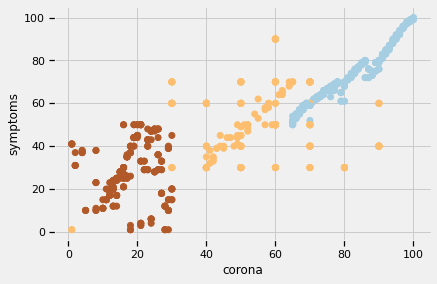

In [33]:
plt.scatter(dataset.iloc[:, 5].values,dataset.iloc[:, 6].values,c=y, cmap=plt.cm.Paired)
plt.xlabel("corona")
plt.ylabel("symptoms")
plt.show()

In [34]:
import tkinter as tk

import shutil
import os
import sys
from PIL import Image, ImageTk

window = tk.Tk()

window.title("Covid Alert")

window.geometry("500x610")
window.configure(background ="lightgreen")

title = tk.Label(text="Enter the parameters to check for corona", background = "lightgreen", fg="Brown", font=("", 15))
title.grid()

states_list=["Tamilnadu","Telangana","Andrapradesh","Kerala"]
More_affected=['Chennai','Dindigal','Erode','Guntur','Hyderabad','Chittoor','Kurnool','Namakkal','Prakasam','Thiruvallur','Tirupur','Trichy',]

less_affected=['Chengalpattu','Cuddalore','Ernakulam','Kancheepuram','Kanyakumari','Kottayam','Kozhikode','Palakkad','Rangareddy','Thanjavur','Thoothukudi','Trivandrum',
               'Vellore','Virudhunagar']

very_less_affected=['Ariyalur','Dharmapuri','Kadapa','Kamareddy','Khammam','Krishnagiri','Mahabubabad','Medchal','Pondicherry','Ramanathapuram','Rayagoda','Srikakulam','Thiruvannamalai',]

state=tk.StringVar()
district=tk.StringVar()
corona=tk.StringVar()
symptoms=tk.StringVar()
vaccine = tk.StringVar()

entry1 = tk.Label(text="Enter State", background="lightgreen",
                      fg="Brown", font=("", 15))
entry1.grid(column=0, row=1, padx=10, pady = 10)
entry = tk.Entry(window, textvariable=state)
entry.grid(column=0, row=2, padx=10, pady = 10)
entry1 = tk.Label(text="Enter District", background="lightgreen",
                      fg="Brown", font=("", 15))
entry1.grid(column=0, row=3, padx=10, pady = 10)
entry = tk.Entry(window, textvariable=district)
entry.grid(column=0, row=4, padx=10, pady = 10)
entry1 = tk.Label(text="Enter Symptoms", background="lightgreen",
                      fg="Brown", font=("", 15))
entry1.grid(column=0, row=5, padx=10, pady = 10)
entry = tk.Entry(window, textvariable=corona)
entry.grid(column=0, row=6, padx=10, pady = 10)
entry1 = tk.Label(text="Enter Corona", background="lightgreen",
                      fg="Brown", font=("", 15))
entry1.grid(column=0, row=7, padx=10, pady = 10)
entry = tk.Entry(window, textvariable=symptoms)
entry.grid(column=0, row=8, padx=10, pady = 10)
entry1 = tk.Label(text="Enter Vaccine", background="lightgreen",
                      fg="Brown", font=("", 15))
entry1.grid(column=0, row=9, padx=10, pady = 10)
entry = tk.Entry(window, textvariable=vaccine)
entry.grid(column=0, row=10, padx=10, pady = 10)


def alert():
    window.destroy()
    window1 = tk.Tk()

    window1.title("corona Alert")

    window1.geometry("500x510")
    window1.configure(background="lightgreen")

    def exit():
        window1.destroy()

    if state.get() in states_list:
        #print("state")
        if district.get() in More_affected:
            #print("dist")
            if symptoms.get() == "yes" or symptoms.get() == "no":
                #print("symp")
                if vaccine.get() == "yes" or vaccine.get() == "no":
                    #print("vacc")
                    if corona.get() == "yes":
                        dst = "C:\\Users\\Admin\\OneDrive\\Desktop\\covid 19\\red.jpg"
                        # shutil.copy(fileName, dst)
                        load = Image.open(dst)
                        render = ImageTk.PhotoImage(load)
                        img = tk.Label(image=render, height="250", width="500")
                        img.image = render
                        img.place(x=0, y=0)
                        img.grid(column=0, row=1, padx=10, pady=10)

                        text = "Severly affected "
                        text1 = tk.Label(text=text, background="lightgreen",
                                        fg="Brown", font=("", 15))
                        text1.grid(column=0, row=4, padx=10, pady=10)

                        button = tk.Button(text="Exit", command=exit)
                        button.grid(column=0, row=11, padx=20, pady=20)
                    
                    
                    else:
                        dst = "C:\\Users\\Admin\\OneDrive\\Desktop\\covid 19\\red.jpg"
                        # shutil.copy(fileName, dst)
                        load = Image.open(dst)
                        render = ImageTk.PhotoImage(load)
                        img = tk.Label(image=render, height="250", width="500")
                        img.image = render
                        img.place(x=0, y=0)
                        img.grid(column=0, row=1, padx=10, pady=10)

                        text = "Please Take a Corona Test"
                        text1 = tk.Label(text=text, background="lightgreen",
                                        fg="Brown", font=("", 15))
                        text1.grid(column=0, row=4, padx=10, pady=10)

                        button = tk.Button(text="Exit", command=exit)
                        button.grid(column=0, row=11, padx=20, pady=20)
        elif district.get() in less_affected:
            if(symptoms.get() =="yes" or symptoms.get()== "no"):
                if(vaccine.get() =="yes" or vaccine.get()== "no"):
                    if corona.get() == "yes":
                        
                        dst = "C:\\Users\\Admin\\OneDrive\\Desktop\\covid 19\\yellow.jpg"
                        # shutil.copy(fileName, dst)
                        load = Image.open(dst)
                        render = ImageTk.PhotoImage(load)
                        img = tk.Label(image=render, height="250", width="500")
                        img.image = render
                        img.place(x=0, y=0)
                        img.grid(column=0, row=1, padx=10, pady=10)

                        text = "Mildly affected "
                        text1 = tk.Label(text=text, background="lightgreen",
                                        fg="Brown", font=("", 15))
                        text1.grid(column=0, row=4, padx=10, pady=10)

                        button = tk.Button(text="Exit", command=exit)
                        button.grid(column=0, row=11, padx=20, pady=20)
                    else:
                        dst = "C:\\Users\\Admin\\OneDrive\\Desktop\\covid 19\\yellow.jpg"
                        # shutil.copy(fileName, dst)
                        load = Image.open(dst)
                        render = ImageTk.PhotoImage(load)
                        img = tk.Label(image=render, height="250", width="500")
                        img.image = render
                        img.place(x=0, y=0)
                        img.grid(column=0, row=1, padx=10, pady=10)

                        text = "Please Take a Corona Test"
                        text1 = tk.Label(text=text, background="lightgreen",
                                        fg="Brown", font=("", 15))
                        text1.grid(column=0, row=4, padx=10, pady=10)

                        button = tk.Button(text="Exit", command=exit)
                        button.grid(column=0, row=11, padx=20, pady=20)
        elif district.get() in very_less_affected:
            if (symptoms.get() == "yes" or symptoms.get() == "no"):
                if(vaccine.get() =="yes" or vaccine.get()== "no"):
                    
                    if corona.get() == "yes":
                        dst = "C:\\Users\\Admin\\OneDrive\\Desktop\\covid 19\\green.jpg"
                        # shutil.copy(fileName, dst)
                        load = Image.open(dst)
                        render = ImageTk.PhotoImage(load)
                        img = tk.Label(image=render, height="250", width="500")
                        img.image = render
                        img.place(x=0, y=0)
                        img.grid(column=0, row=1, padx=10, pady=10)

                        text = "Not affected "
                        text1 = tk.Label(text=text, background="lightgreen",
                                        fg="Brown", font=("", 15))
                        text1.grid(column=0, row=4, padx=10, pady=10)

                        button = tk.Button(text="Exit", command=exit)
                        button.grid(column=0, row=11, padx=20, pady=20)
                    else:
                        dst = "C:\\Users\\Admin\\OneDrive\\Desktop\\covid 19\\green.jpg"
                        # shutil.copy(fileName, dst)
                        load = Image.open(dst)
                        render = ImageTk.PhotoImage(load)
                        img = tk.Label(image=render, height="250", width="500")
                        img.image = render
                        img.place(x=0, y=0)
                        img.grid(column=0, row=1, padx=10, pady=10)

                        text = "Not Infected "
                        text1 = tk.Label(text=text, background="lightgreen",
                                        fg="Brown", font=("", 15))
                        text1.grid(column=0, row=4, padx=10, pady=10)

                        button = tk.Button(text="Exit", command=exit)
                        button.grid(column=0, row=11, padx=20, pady=20)
                        
    window1.mainloop()

button1 = tk.Button(text="predict", command = alert)
button1.grid(column=0, row=11, padx=10, pady = 10)



window.mainloop()